<a href="https://colab.research.google.com/github/TheAshish07/First-Portfolio/blob/main/Apriori_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Dataset (Binary Encoding):
    Bread  Butter   Eggs    Jam   Milk
0   True    True  False  False   True
1   True    True  False   True  False
2   True   False   True  False   True
3   True    True   True  False   True
4   True   False   True  False  False

Frequent Itemsets:
    support         itemsets
0      1.0          (Bread)
1      0.6         (Butter)
2      0.6           (Eggs)
3      0.6           (Milk)
4      0.6  (Bread, Butter)
5      0.6    (Bread, Eggs)
6      0.6    (Milk, Bread)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)    (Butter)                 1.0                 0.6      0.6   
1    (Butter)     (Bread)                 0.6                 1.0      0.6   
2     (Bread)      (Eggs)                 1.0                 0.6      0.6   
3      (Eggs)     (Bread)                 0.6                 1.0      0.6   
4      (Milk)     (Bread)                 0.6                 1.0      0.6   
5     (Bre

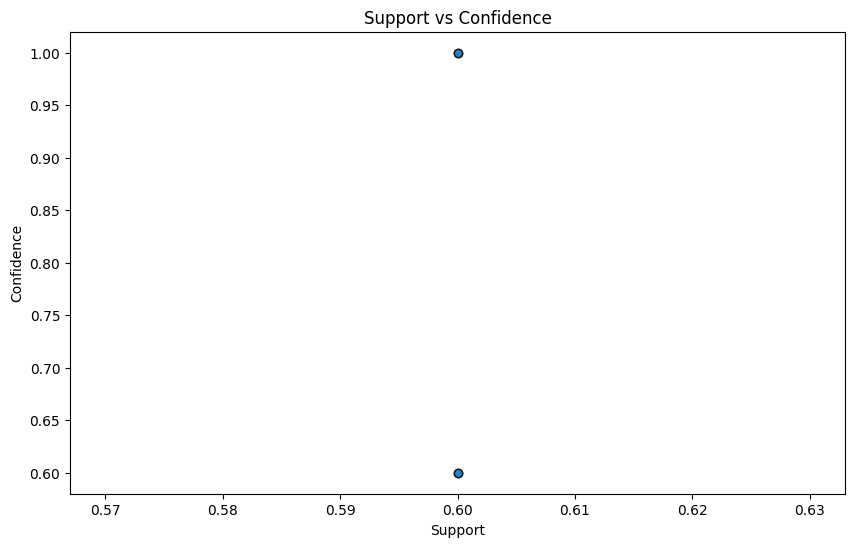

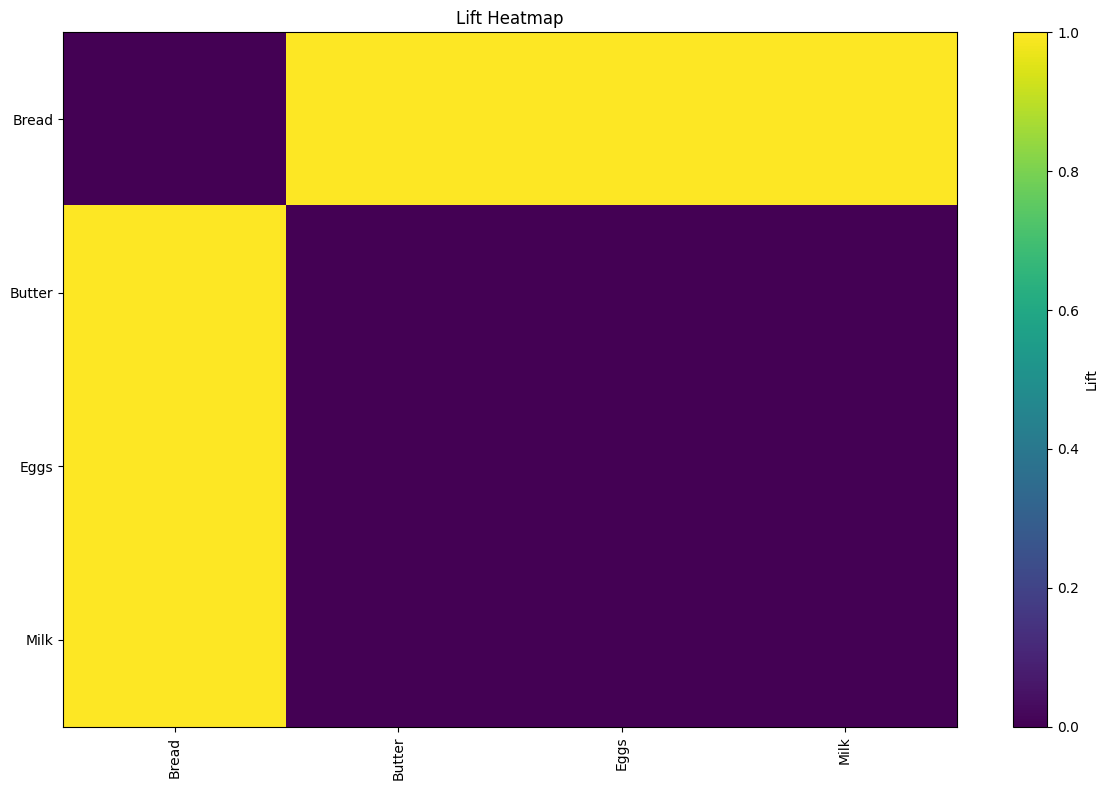

<Figure size 1000x600 with 0 Axes>

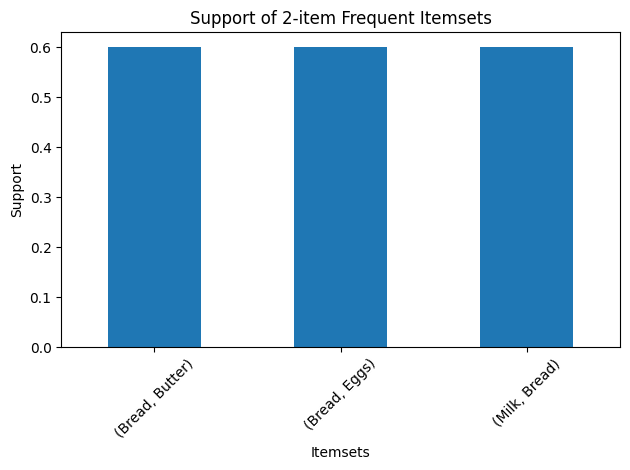

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset: List of transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter', 'Eggs', 'Bread'],
    ['Bread', 'Eggs']
]

# Convert transactions into a DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset (Binary Encoding):\n", df)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=5)
print("\nAssociation Rules:\n", rules)

# Plot the support vs confidence for rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Plot heatmap of lift
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()

# Plot bar chart for frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
plt.figure(figsize=(10, 6))
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Support of 2-item Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Sample:
   cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                     

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Association Rules:
         antecedents                     consequents  antecedent support  \
0               (b)                             (c)            0.947070   
1               (c)                             (b)            0.855244   
2               (d)                             (b)            0.387494   
3               (b)                             (e)            0.947070   
4               (e)                             (b)            0.964549   
...             ...                             ...                 ...   
1114939   (y, f, k)     (s, o, e, t, w, b, c, n, p)            0.409527   
1114940   (y, n, k)     (s, o, e, t, w, b, c, f, p)            0.334687   
1114941   (y, p, k)     (s, o, e, t, w, b, c, f, n)            0.409527   
1114942      (t, y)  (s, o, e, w, k, b, c, f, n, p)            0.415559   
1114943      (y, k)  (s, o, e, t, w, b, c, f, n, p)            0.409527   

         consequent support   support  confidence      lift  representativity 

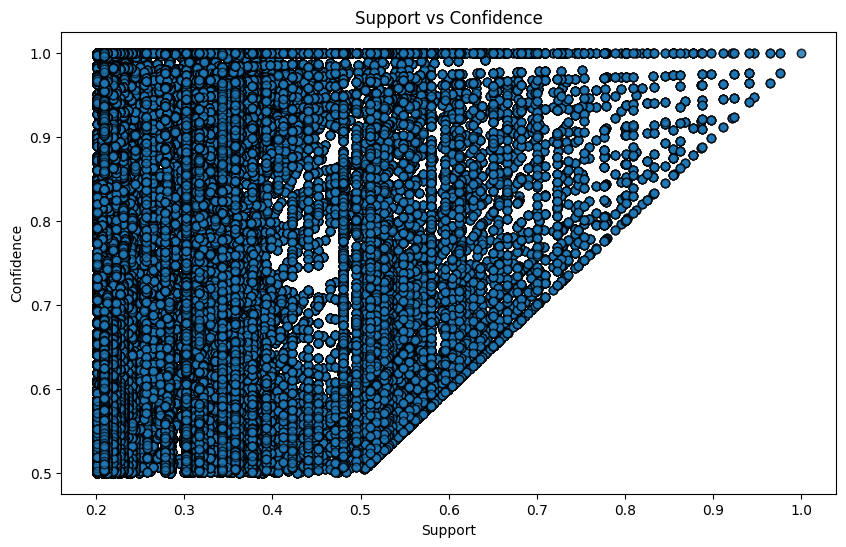

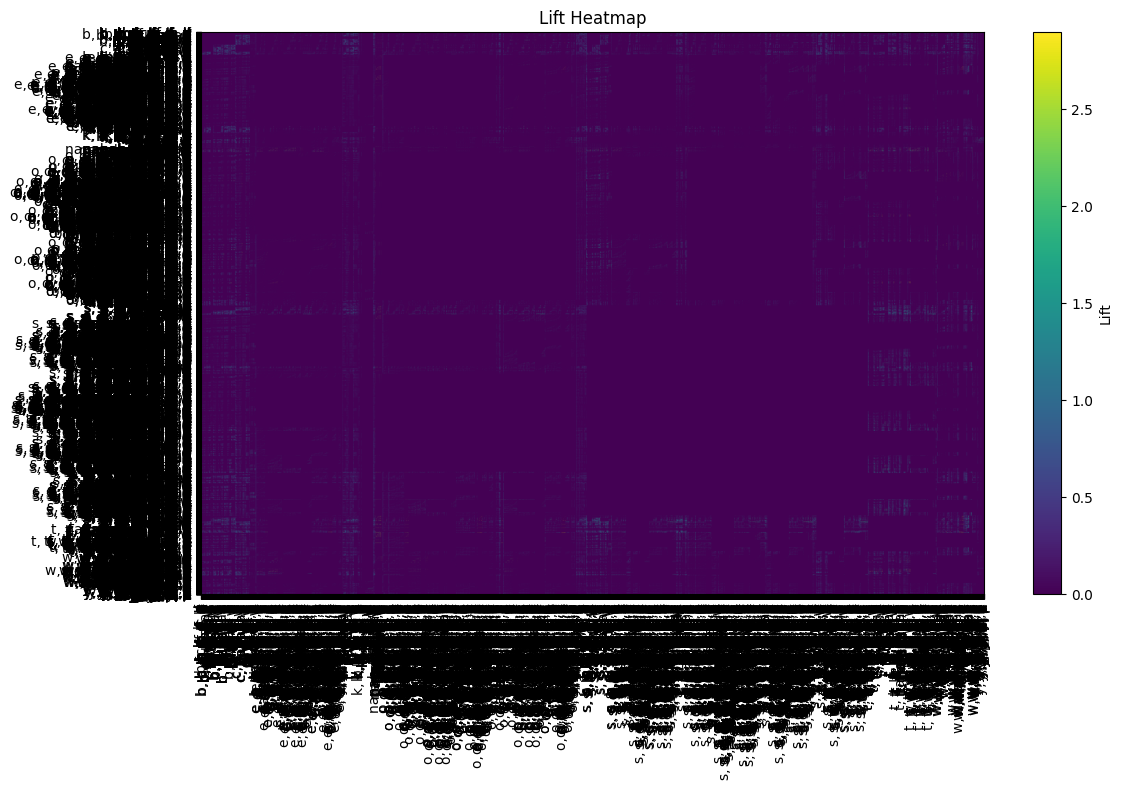

In [ ]:
from sklearn.datasets import fetch_openml
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load Mushroom dataset from sklearn
mushroom_data = fetch_openml(name='mushroom', version=1, as_frame=True)
df = mushroom_data.frame

# Display basic info
print("Dataset Sample:\n", df.head())
print("Shape of the dataset:", df.shape)

# Convert to transactional format
transactions = df.astype(str).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm
min_support = 0.2  # 20% minimum support
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.5  # 50% minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=1)
print("\nAssociation Rules:\n", rules)

# Visualize support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Visualize lift with a heatmap
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()


# **Q-Learning**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


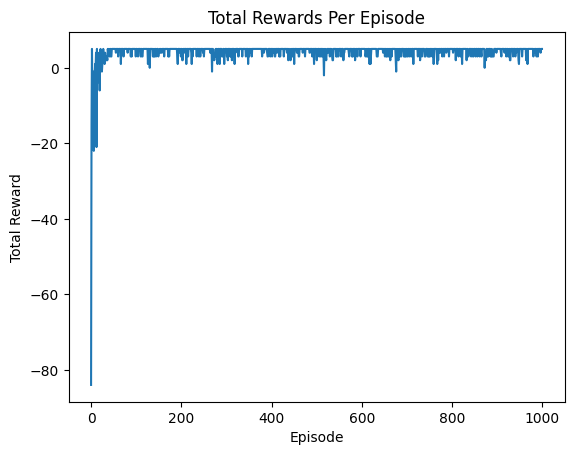

State (0, 0): [0.46453602 1.8098     0.45461954 1.17455425]
State (0, 1): [-1.02569477  3.0823492  -1.11934852 -1.27438111]
State (0, 2): [ 0.46744277  4.35710198 -0.63817435 -0.85845972]
State (0, 3): [-0.4828824   0.60723151 -0.42657387 -0.3940399 ]
State (1, 0): [0.42194023 1.38022371 1.34186932 3.122     ]
State (1, 1): [1.14799537 3.62838851 1.23132715 4.58      ]
State (1, 2): [2.36779924 6.2        2.88931361 5.16399682]
State (1, 3): [-0.19        7.76219138 -0.2175409   0.45106262]
State (2, 0): [-0.9126836  -0.79123014 -0.53551673  3.97262157]
State (2, 1): [-0.4097863   0.02315576 -0.01823548  6.19573275]
State (2, 2): [4.30153035 8.         4.13025269 7.68250052]
State (2, 3): [0.44823999 9.99730278 0.         2.94686395]
State (3, 0): [-0.40972069 -0.3940399  -0.3940399   0.3278905 ]
State (3, 1): [-0.31034341  0.09705021 -0.20791     7.43997033]
State (3, 2): [ 5.56946896  6.68573673  4.17578693 10.        ]
State (3, 3): [0. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
